# 0x08 Object Detection and Segmentation

In this notebook we will have a hands-on with object detection and segmentation.

Object detection aims to predict a bounding box and a class label for each object (usually, in the predifined set) in an image. 
Segmentation goes a step further by predicting a pixel-wise mask for each object, allowing us to delineate the exact shape of the object within the image.

## 1. Object Detection

In this notebook we will utilize the YOLO architecture for object detection tasks. 

YOLO, which stands for "You Only Look Once," is a popular deep learning model known for its speed and accuracy in detecting objects within images.
We will utilize the YOLO implementation provided by ultralytics.

If you are interested in the architecture of YOLO, check the original paper.

[You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640)

It is worth noticing that YOLO has undergone several iterations, marked with versions such as YOLOv2, YOLOv3, YOLOv4...

In [1]:
from ultralytics import YOLO

Today we will use YOLO12, which is the latest YOLO version provided by ultralytics at the time of writing this notebook.

In [11]:
model = YOLO("yolo12n.pt")

Let's experiment with a home interior image (Photographer: Patrick Perkins, Source: Unsplash).

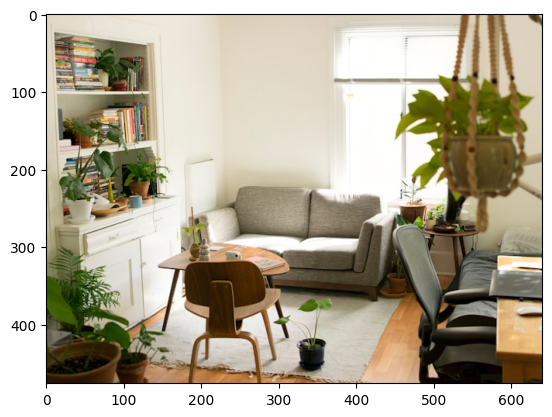

In [3]:
import matplotlib.pyplot as plt
import cv2

EXAMPLE_IMAGE_PATH = "./data/home_interior.jpg"

image = cv2.imread(EXAMPLE_IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Running inference is simple using ultralytics.

In [12]:
results = model(EXAMPLE_IMAGE_PATH, iou=1.0, verbose=False)

Now let's inspect what the shapes of the detection are.

In [13]:
result = results[0]
print("Detection boxes shape:")
print(result.boxes.shape)
print("==============================")
print("Sample detection box:")
sample_box = result.boxes[0]
print(sample_box)

Detection boxes shape:
torch.Size([111, 6])
Sample detection box:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([57.])
conf: tensor([0.8970])
data: tensor([[192.9399, 222.5820, 453.9795, 371.4276,   0.8970,  57.0000]])
id: None
is_track: False
orig_shape: (476, 640)
shape: torch.Size([1, 6])
xywh: tensor([[323.4597, 297.0048, 261.0396, 148.8456]])
xywhn: tensor([[0.5054, 0.6240, 0.4079, 0.3127]])
xyxy: tensor([[192.9399, 222.5820, 453.9795, 371.4276]])
xyxyn: tensor([[0.3015, 0.4676, 0.7093, 0.7803]])


You can notice that each detection box has 6 values associated with it. These values are:
- x1: The x-coordinate of the top-left corner of the bounding box.
- y1: The y-coordinate of the top-left corner of the bounding box.
- x2: The x-coordinate of the bottom-right corner of the bounding box.
- y2: The y-coordinate of the bottom-right corner of the bounding box.
- confidence score: A value between 0 and 1 indicating the confidence of the detection.
- class id: An integer representing the class label of the detected object.

### Visualizing the results
It is time to turn these detection results into bounding boxes on the image.

Writing boilerplates to visualize bounding boxes can be tedious. Luckily, there is a library called `supervision` that can help us with that.

`supervision` is a computer vision tools library that includes model-agnostic computer vision visualization utilities. They also provide interface for ultralytics models.

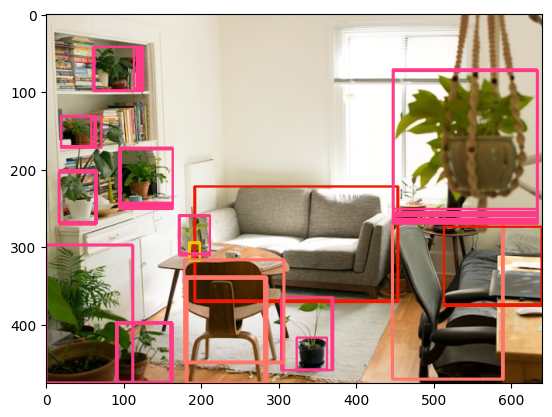

In [14]:
import supervision as sv

# This converts the ultralytics result into supervision Detections object
detections = sv.Detections.from_ultralytics(result)

# And now we can visualize the bounding boxes using supervision annotator
box_annotator = sv.BoxAnnotator()
annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections
)
plt.imshow(annotated_frame)

> 🤔 **THINKING**
>
> - Take a look at this detection result. What problems do you notice?
> - What could be the cause of the problem? (Hint: Notice we set `iou=1.0` when running inference. If this still seems magical to you, check out [Non-Maximum Suppression](https://www.ultralytics.com/glossary/non-maximum-suppression-nms) by Ultralytics.)
> - Find a way to fix the problem and visualize again. What do you discover?

# 2. Segmentation

Segmentation predicts the object class at the pixel level, which offers more granuarity compared to object detection (bounding boxes).

In [7]:
from ultralytics import SAM

# Load a model
model = SAM("mobile_sam.pt")

In [8]:
results = model(EXAMPLE_IMAGE_PATH, verbose=False)

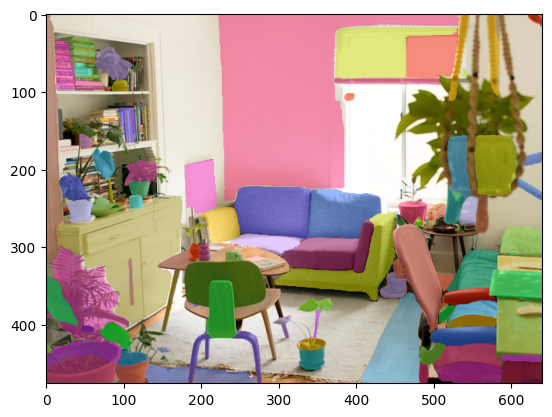

In [9]:
detections = sv.Detections.from_ultralytics(results[0])
mask_annotator = sv.MaskAnnotator()
annotated_frame = mask_annotator.annotate(
    scene=image.copy(),
    detections=detections
)
plt.imshow(annotated_frame)